In [1]:
%matplotlib inline

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_auc_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
from sklearn.preprocessing import StandardScaler
# ============================== loading libraries ===========================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import cross_validation

con=sqlite3.connect('database.sqlite') 

filtered_data = pd.read_sql_query("""
SELECT *
FROM Reviews
WHERE Score != 3 limit 1000
""", con) 


def partition(x):
    if x > 3:
        return 1
    return 0

actualScore = filtered_data['Score']
positiveNegative = actualScore.map(partition) 
filtered_data['Score'] = positiveNegative



/home/dtewani/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#Sorting data according to ProductId in ascending order
sorted_data=filtered_data.sort_values('ProductId', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

In [3]:
final=sorted_data.drop_duplicates(subset={"UserId","ProfileName","Time","Text"}, keep='first', inplace=False)
final.shape

(998, 10)

In [4]:
data = final.head(998)
data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
10,11,B0001PB9FE,A3HDKO7OW0QNK4,Canadian Fan,1,1,1,1107820800,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...
232,253,B0002567IW,A1SSKFPX72MSMR,"Janna M. Sicard ""missjanna""",0,0,0,1344556800,Sad outcome,"Five minutes in, one tentacle was bitten off, ..."
171,188,B00029XIZI,A2S72TUJDQUBMH,Nadia,0,0,1,1236124800,Miracle,My Scotties were full of hot spots and when I ...
932,1011,B0002MKFEM,A3QLX72AO0DD5Z,Carlito Picache,1,2,1,1226361600,Way too salty,I tried this and I found it too salty.<br />Pl...
893,969,B0002XIB2Y,A3NV17B17PFB7G,Susan,3,3,1,1228176000,WONDERFUL gravy!,"This gravy mix is excellent ... except, don't ..."
894,970,B0002XIB2Y,A1O3WOX0KBBV3W,MATHEW Geib,1,1,1,1260057600,YEEEEE HAWWW!,"I'm not from the south, but live in SoFla; whe..."
895,971,B0002XIB2Y,A2DRQBOGCTC5HP,"TL ""TerryLea""",2,3,1,1191715200,Best white gravy !,Nothing easier. Nothing better. Even beats gra...
896,972,B0002XIB2Y,A1891H0TIXLDXA,Donald M. Bridges,1,2,1,1250294400,Pioneer Gravy is GREAT!,I have used Pioneer Gravy for a number of year...
380,414,B00061KYVI,A29ZSRDOYVO735,"Robert Ames ""Spenser_man""",0,0,1,1264809600,Franch's is the best,It's always a pleasure to find French's produc...
379,413,B00061KYVI,A3JE18D4XD2PYF,pattymelt,0,0,1,1282521600,best roast ever,This is the best way to cook a roast. Our loc...


In [6]:
#from sklearn.preprocessing import StandardScaler
##from sklearn.preprocessing import Normalizer
##standardized_data = Normalizer(norm='l2', copy=True).fit_transform(data)
#print(standardized_data.shape)

In [5]:
import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

stop = set(stopwords.words('english')) #set of stopwords
sno = nltk.stem.SnowballStemmer('english') #initialising the snowball stemmer

def cleanhtml(sentence): #function to clean the word of any html-tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned
print(stop)
print('************************************')
print(sno.stem('tasty'))

{"isn't", 'my', 'to', 'yourselves', 'theirs', "wasn't", 'didn', 'above', "didn't", 'she', 'where', 's', 'are', 'weren', 'but', 'him', "mustn't", 'hadn', 'between', 'we', 'he', 'doing', 'shan', 'itself', "weren't", 'me', 'before', 'should', 'below', "doesn't", 'such', 'o', 'from', 'out', 'at', 'wasn', 'until', 'because', 'our', 'ain', 'did', 'in', 'more', 'too', "shan't", 'both', 'can', 'each', 'the', 'this', 'into', 'then', 'his', 'ours', 'her', "won't", 'having', 'here', 'herself', 'had', 'will', 'against', 't', 'do', 'ma', 'as', "hasn't", 'with', 'himself', 'your', 'own', 'ourselves', "haven't", 'of', 'have', 'or', "shouldn't", 'its', 'wouldn', 'than', 'don', 'is', 'they', 'isn', 'all', 'were', 'same', 'shouldn', 'very', 'down', 'd', 'couldn', 'them', 'up', 'about', 'a', 'whom', 'be', 'now', 'has', 'there', 'that', 'when', 'it', 'and', "should've", 'haven', 'being', 'was', 're', 'other', 'why', 'i', "you've", "mightn't", 'if', 'you', 'doesn', 'their', 'further', "wouldn't", "aren't",

In [6]:
#Code for implementing step-by-step the checks mentioned in the pre-processing phase
# this code takes a while to run as it needs to run on 500k sentences.
i=0
str1=' '
final_string=[]
all_positive_words=[] # store words from +ve reviews here
all_negative_words=[] # store words from -ve reviews here.
s=''
for sent in final['Text'].values:
    filtered_sentence=[]
    #print(sent);
    sent=cleanhtml(sent) # remove HTMl tags
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if((cleaned_words.isalpha()) & (len(cleaned_words)>2)):    
                if(cleaned_words.lower() not in stop):
                    s=(sno.stem(cleaned_words.lower())).encode('utf8')
                    filtered_sentence.append(s)
                    if (final['Score'].values)[i] == 2: 
                        all_positive_words.append(s) #list of all words used to describe positive reviews
                    if(final['Score'].values)[i] == 1:
                        all_negative_words.append(s) #list of all words used to describe negative reviews reviews
                else:
                    continue
            else:
                continue 
    #print(filtered_sentence)
    str1 = b" ".join(filtered_sentence) #final string of cleaned words
    #print("***********************************************************************")
    
    final_string.append(str1)
    i+=1

In [7]:
final['clean']=final_string

/home/dtewani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [34]:
#BoW
count_vect = CountVectorizer() #in scikit-learn
final_counts = count_vect.fit_transform(final['clean'].values )
##X = final_counts.todense()
dense_data_bow = final_counts.todense()
#dense_data_bow=final_counts

In [28]:
a=list(dense_data_bow.toarray())

In [30]:
kdt = KDTree(a, leaf_size=3)

In [31]:
kdt

In [ ]:
dist, idx = kdt.query(people['tfidf'][people['name']=='Barack Obama'].tolist(), k=3)

In [9]:
dense_data_bow.shape

(998, 4065)

In [10]:
labels_1000 = final['Score'] 

In [35]:
# Part I
# ============================== data preprocessing ===========================================

# define column names
#names = ['x', 'y', 'class']
##names = ['x']
# loading training data
df = labels_1000
#print(df.head())
#df.head()
# create design matrix X and target vector y
y = np.array(df) # end index is exclusive
#y=df
#df.reshape((999,1))
#y = np.array(df['class']) # showing you two ways of indexing a pandas df
X=dense_data_bow

In [14]:
y.shape

(998,)

In [36]:
# split the data set into train and test
X_1, X_test, y_1, y_test = cross_validation.train_test_split(X, y, test_size=0.3, random_state=0)

# split the train data set into cross validation train and cross validation test
X_tr, X_cv, y_tr, y_cv = cross_validation.train_test_split(X_1, y_1, test_size=0.3)

y.shape

(998,)

In [18]:
X_tr.shape

(4685, 11852)

In [21]:
X_1.shape

(698, 4065)

In [20]:
y_1.shape

(6694,)

In [37]:
for i in range(1,30,2):
    # instantiate learning model (k = 30)
    knn = KNeighborsClassifier(n_neighbors=i,algorithm='kd_tree')

    # fitting the model on crossvalidation train
    knn.fit(X_1, y_1)
    pred = knn.predict(X_cv)

    # evaluate CV accuracy
    acc = accuracy_score(y_cv, pred, normalize=True) * float(100)
    print('\nCV accuracy for k = %d is %d%%' % (i, acc))
knn = KNeighborsClassifier(1)
knn.fit(X_tr,y_tr)
pred = knn.predict(X_test)
acc = accuracy_score(y_test, pred, normalize=True) * float(100)
print('\n****Test accuracy for k = 1 is %d%%' % (acc))   


CV accuracy for k = 1 is 100%

CV accuracy for k = 3 is 87%

CV accuracy for k = 5 is 85%

CV accuracy for k = 7 is 84%

CV accuracy for k = 9 is 83%

CV accuracy for k = 11 is 83%

CV accuracy for k = 13 is 83%

CV accuracy for k = 15 is 83%

CV accuracy for k = 17 is 83%

CV accuracy for k = 19 is 83%

CV accuracy for k = 21 is 83%

CV accuracy for k = 23 is 83%

CV accuracy for k = 25 is 83%

CV accuracy for k = 27 is 83%

CV accuracy for k = 29 is 83%

****Test accuracy for k = 1 is 76%



The optimal number of neighbors is 9.


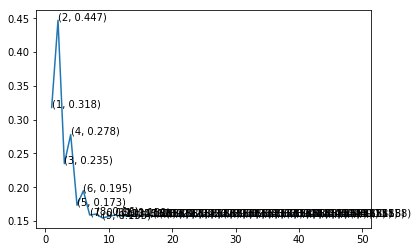

the misclassification error for each k value is :  [0.318 0.447 0.235 0.278 0.173 0.195 0.159 0.16  0.155 0.159 0.158 0.158
 0.158 0.158 0.158 0.158 0.158 0.158 0.158 0.158 0.158 0.158 0.158 0.158
 0.158 0.158 0.158 0.158 0.158 0.158 0.158 0.158 0.158 0.158 0.158 0.158
 0.158 0.158 0.158 0.158 0.158 0.158 0.158 0.158 0.158]


In [39]:
# creating odd list of K for KNN
myList = list(range(0,50))
neighbors = list(filter(lambda x: x % 10 != 0, myList))

# empty list that will hold cv scores
cv_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k,algorithm='kd_tree')
    scores = cross_val_score(knn, X_1, y_1, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)

plt.plot(neighbors, MSE)

for xy in zip(neighbors, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

#plt.xlabel('Number of Neighbors K')
#plt.ylabel('Misclassification Error')
plt.show()

print("the misclassification error for each k value is : ", np.round(MSE,3))

In [25]:
x2=X_1.toarray()

In [111]:
X_1.shape

(6694, 11852)

In [164]:
y2=y_1
#y_cv2=y_cv.flatten()

In [105]:
(X_1).shape

(6694, 11852)

In [20]:
X_1.data

array([2, 2, 1, ..., 2, 1, 1], dtype=int64)

In [181]:
y_train_pred.shape

(6694,)

In [123]:
y_1.shape

(6694,)

In [16]:
from sklearn.neighbors import KDTree

In [18]:
kdt = KDTree(X_1, leaf_size=3)

ValueError: setting an array element with a sequence.

In [43]:
from sklearn.preprocessing import label_binarize
train_auc = []
cv_auc = []
#y2 = label_binarize(y_1, classes=['0.', '1.'])
#ycv = label_binarize(y_cv, classes=['0.', '1.'])
#y2=y2.flatten()
K = [1,3,7,5,10,15,17]

for i in K:
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_1, y_1)  
    y_train_pred =  neigh.predict_proba (X_1)[:,1]
    y_cv_pred =  neigh.predict_proba(X_cv)[:,1]
    train_auc.append(roc_auc_score(y2,y_train_pred))
    cv_auc.append(roc_auc_score(ycv, y_cv_pred))
    
plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()   

ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

In [196]:
y2.shape

(698, 1)

In [197]:
X_1.shape

(698, 4065)

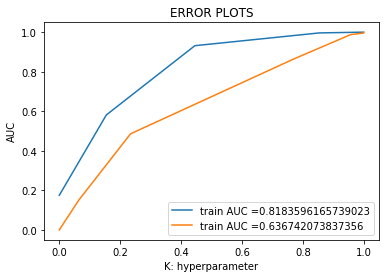

Train confusion matrix
[[ 16  94]
 [  2 586]]
Test confusion matrix
[[  2  45]
 [  3 250]]


In [49]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

y2 = label_binarize(y_1, classes=['0.', '1.'])
ycv = label_binarize(y_cv, classes=['0.', '1.'])
y_test_1 = label_binarize(y_test, classes=['0.', '1.'])
neigh = KNeighborsClassifier(n_neighbors=7,algorithm='kd_tree')
neigh.fit(X_1, y_1)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

train_fpr, train_tpr, thresholds = roc_curve(y_1, neigh.predict_proba(X_1)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, neigh.predict_proba(X_test)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="train AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

print("="*100)

from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_1, neigh.predict(X_1)))
print("Test confusion matrix")
print(confusion_matrix(y_test, neigh.predict(X_test)))

In [ ]:
test_fpr, test_tpr, thresholds = roc_curve(y_test, neigh.predict_proba(X_test_bow)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="train AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

print("="*100)

from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, neigh.predict(X_train_bow)))
print("Test confusion matrix")
print(confusion_matrix(y_test, neigh.predict(X_test_bow)))

In [158]:
y_2=np.array(y_1)

In [41]:
y2

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [167]:
np.where(y_1='1.', 1, 0)

SyntaxError: positional argument follows keyword argument (<ipython-input-167-ae4bcff4883f>, line 1)

In [168]:
np.select([y_1 <= .5, y_1>.5], [np.zeros_like(a), np.ones_like(a)])

TypeError: '<=' not supported between instances of 'str' and 'float'

In [48]:
import numpy
numpy.set_printoptions(threshold=numpy.nan)
y2

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [32]:
y2=y_1.to_xarray
y2.shape()

AttributeError: 'function' object has no attribute 'shape'

In [60]:
y3=y_1.reshape(0, 1)

AttributeError: 'Series' object has no attribute 'reshape'

In [50]:
from sklearn import preprocessing

In [63]:
binarizer = preprocessing.Binarizer().fit(y_1)  # fit does nothing



#Binarizer.transform(y_1)

ValueError: Expected 2D array, got 1D array instead:
array=[1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1.
 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0.
 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0.
 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1.
 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1.
 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0.
 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1.
 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0.
 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1.
 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1.
 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1.
 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0.
 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0.
 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0.
 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0.
 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0.
 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0.
 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1.
 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0.
 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1.
 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1.
 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1.
 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1.
 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1.
 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1.
 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1.
 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0.
 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1.
 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.
 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0.
 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1.
 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0.
 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1.
 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1.
 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1.
 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0.
 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0.
 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0.
 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1.
 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1.
 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0.
 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.
 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
from sklearn.preprocessing import label_binarize
train_auc = []
cv_auc = []
y_1 = label_binarize(y_1.ravel(), classes=[1, 2])
K = [1,3,7,5,10,15,17]
for i in K:
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_1, y_1)
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs
    y_train_pred =  neigh.predict_proba (X_1)[:1]
    y_cv_pred =  neigh.predict_proba(X_cv)
    
    #train_auc.append(roc_auc_score(y_1,y_train_pred))
    #cv_auc.append(roc_auc_score(y_cv, y_cv_pred))    
  

In [ ]:
y_train_pred =  neigh.predict_proba(X_train_bow)[:,1]
    y_cv_pred =  neigh.predict_proba(X_cv_bow)[:,1]
    
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

In [152]:
y_train_pred.shape

(4685,)

In [48]:
print(y_1)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [ ]:
x = [list(i) for i in a]

In [226]:
y_3 =y_1[0].astype('object')

AttributeError: 'str' object has no attribute 'astype'

In [223]:
y_3=y_1.tolist()

In [224]:
y3

array(['0', '0', '0', '0', '-1', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '-1', '0', '0', '0', '0', '0', '0', '0', '0', '-1', '0', '0', '0',
       '0', '0', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '-1', '0',
       '0', '0', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '-1', '-1',
       '0', '0', '0', '-1', '0', '0', '0', '-1', '0', '-1', '0', '0', '0',
       '0', '0', '0', '-1', '0', '-1', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '-1', '0', '0', '0', '0', '0', '0', '-1', '0', '0',
       '0', '0', '-1', '0', '0', '0', '0', '0', '0', '-1', '0', '0', '0',
       '0', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '-1', '0', '0', '0', '0', '0', '-1', '0', '0',
       '0', '0', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '-1', '-1', '0', '0', '-1

In [227]:
y4=(['0', '0', '0', '0', '-1', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '-1', '0', '0', '0', '0', '0', '0', '0', '0', '-1', '0', '0', '0',
       '0', '0', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '-1', '0',
       '0', '0', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '-1', '-1',
       '0', '0', '0', '-1', '0', '0', '0', '-1', '0', '-1', '0', '0', '0',
       '0', '0', '0', '-1', '0', '-1', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '-1', '0', '0', '0', '0', '0', '0', '-1', '0', '0',
       '0', '0', '-1', '0', '0', '0', '0', '0', '0', '-1', '0', '0', '0',
       '0', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '-1', '0', '0', '0', '0', '0', '-1', '0', '0',
       '0', '0', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '-1', '-1', '0', '0', '-1', '0', '-1', '0', '0', '0',
       '-1', '0', '0', '0', '-1', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '-1', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '-1', '0', '0', '0', '-1', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '-1', '0', '0',
       '0', '-1', '0', '0', '-1', '0', '0', '0', '0', '0', '0', '0', '-1',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '-1',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '-1', '0', '0', '0',
       '0', '0', '-1', '0', '0', '-1', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '-1', '0', '0', '0', '0',
       '-1', '0', '-1', '0', '0', '-1', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '-1', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '-1', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '-1', '0', '-1', '0', '0',
       '0', '-1', '-1', '0', '-1', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '-1', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '-1',
       '0', '0', '0', '0', '0', '0', '0', '-1', '0', '0', '0', '0', '0',
       '0', '-1', '0', '0', '0', '0', '-1', '0', '0', '0', '0', '-1', '0',
       '0', '0', '0', '-1', '0', '0', '0', '-1', '0', '0', '-1', '-1',
       '0', '-1', '-1', '0', '0', '0', '-1', '0', '0', '-1', '0', '0',
       '0', '-1', '0', '0', '0', '-1', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '-1', '0', '0', '0', '0', '0', '0', '0', '-1', '0', '0',
       '0', '0', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '-1', '0', '0', '0', '0', '-1', '0', '0', '0', '0',
       '0', '-1', '0', '0', '-1', '-1', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '-1', '0', '0', '0', '-1', '0', '0',
       '0', '0', '0', '0', '0', '-1', '-1', '-1', '0', '0', '-1', '0',
       '-1', '0', '0', '0', '0', '0', '-1', '0', '0', '0', '0', '0', '-1',
       '-1', '0', '0', '0', '-1', '-1', '0', '0', '0', '0', '0', '0',
       '-1', '0', '-1', '0', '-1', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '-1', '0', '0', '-1',
       '-1', '0', '0', '0', '0', '-1', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '-1', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '-1', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '-1', '0', '-1', '0', '-1', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '-1',
       '0', '0', '-1', '0', '0', '0', '-1', '0', '0', '-1', '-1', '0',
       '0', '-1', '-1', '-1', '-1', '0', '-1', '-1', '0', '-1', '0', '-1',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '-1', '0',
       '0', '0', '0', '0', '0', '0', '0', '-1', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '-1', '-1', '0', '0', '0', '0', '0', '-1', '0',
       '-1', '0', '0', '0', '0', '0', '0', '0', '-1', '0', '0', '0', '0',
       '0', '0', '-1', '0', '0', '0', '0', '0', '0', '-1', '0', '0', '-1',
       '0', '0', '-1', '0', '0', '0', '0', '0', '-1', '0', '0', '0', '-1',
       '0', '0', '0', '0', '0', '-1', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '-1', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '-1', '-1', '0', '0', '-1', '0', '0', '0', '0',
       '-1', '0', '-1', '0', '0', '0', '0', '0', '-1', '0', '0', '0',
       '-1', '0', '0', '0', '0', '0', '-1', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '-1', '0', '0', '-1', '0', '-1', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '-1', '0', '0', '0', '0', '-1',
       '0', '0', '0', '0', '0', '0', '0', '0', '-1', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '-1', '-1', '0', '0', '0', '0',
       '0', '0', '0', '0', '-1', '0', '0', '0', '-1', '0', '0', '-1', '0',
       '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '-1', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '-1', '0', '0', '0', '0', '0', '-1', '-1', '0', '0', '0', '0',
       '-1', '0', '-1', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '-1', '-1', '0', '-1', '-1', '0', '0', '0', '0', '-1', '-1',
       '0', '0', '0', '0', '0', '-1', '0', '0', '-1', '0', '-1', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '-1', '0', '0',
       '-1', '0', '-1', '0', '0', '0', '0', '0', '-1', '0', '0', '0',
       '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '-1', '0', '0', '0', '-1',
       '0', '0', '0', '0', '-1', '0', '0', '0', '-1', '0', '0', '0', '0',
       '0', '0', '0', '0', '-1', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '-1', '0', '-1', '0', '0', '0', '0', '0',
       '0', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '-1', '-1', '0', '0', '0', '0', '0', '0', '-1', '0', '-1', '0',
       '0', '0', '0', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '-1',
       '0', '0', '0', '0', '-1', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '-1', '0', '0', '0',
       '-1', '0', '0', '0', '0', '0', '-1', '0', '0', '0', '0', '0', '-1',
       '0', '0', '-1', '0', '0', '0', '0', '0', '0', '0', '-1', '-1', '0',
       '-1', '0', '0', '0', '0', '0', '0', '-1', '-1', '-1', '0', '-1',
       '0', '-1', '0', '0', '0', '0', '0', '-1', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '-1', '0', '-1', '0', '0', '0', '0',
       '0', '-1', '0', '0', '0', '0', '0', '0', '-1', '0', '0', '0', '0',
       '0', '0', '-1', '-1', '0', '0', '-1', '0', '-1', '0', '0', '-1',
       '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '-1', '0', '0', '-1', '-1', '0', '0', '0', '0',
       '0', '0', '0', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '-1', '0', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '-1', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '-1',
       '0', '0', '0', '0', '0', '-1', '0', '0', '0', '0', '0', '-1', '0',
       '0', '0', '-1', '0', '0', '0', '0', '-1', '0', '0', '-1', '0', '0',
       '0', '0', '0', '0', '0', '-1', '0', '-1', '0', '0', '-1', '0', '0',
       '0', '0', '0', '0', '0', '0', '-1', '0', '0', '-1', '0', '0', '0',
       '0', '0', '-1', '0', '0', '0', '0', '0', '0', '0', '-1', '0', '0',
       '-1', '-1', '0', '0', '0', '0', '-1', '0', '0', '0', '0', '0',
       '-1', '0', '0', '0', '0', '0', '0', '0', '0', '-1', '0', '-1',
       '-1', '0', '0', '0', '-1', '-1', '0', '0', '0', '-1', '-1', '0',
       '0', '0', '-1', '0', '0', '0', '0', '0', '0', '0', '-1', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '-1', '0', '0',
       '0', '0', '-1', '-1', '0', '0', '-1', '0', '0', '0', '0', '0', '0',
       '0', '-1', '0', '0', '0', '-1', '0', '0', '0', '0', '0', '-1',
       '-1', '0', '0', '-1', '0', '0', '0', '0', '0', '-1', '0', '0', '0',
       '0', '0', '0', '-1', '0', '0', '-1', '0', '0', '-1', '-1', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '-1', '0', '0', '0', '-1', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '-1', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '-1', '0', '-1', '0', '0', '0', '0', '-1', '0',
       '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '-1', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '-1', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '-1', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '-1', '0', '0',
       '0', '0', '0', '0', '0', '0', '-1', '0', '-1', '0', '0', '0', '0',
       '0', '0', '-1', '-1', '0', '0', '-1', '0', '0', '0', '0', '0', '0',
       '0', '0', '-1', '0', '0', '-1', '0', '-1', '-1', '0', '-1', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '-1', '-1', '-1', '0',
       '0', '0', '0', '0', '0', '0', '-1', '-1', '0', '0', '-1', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '-1', '0', '0', '-1', '0', '0', '-1', '0',
       '0', '0', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '-1', '0',
       '-1', '0', '0', '0', '0', '0', '0', '0', '-1', '0', '0', '0', '0',
       '0', '0', '0', '0', '-1', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '-1', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '-1', '0', '0', '0',
       '0', '0', '-1', '0', '-1', '0', '0', '0', '-1', '0', '-1', '0',
       '0', '0', '0', '-1', '0', '-1', '0', '0', '-1', '0', '-1', '-1',
       '-1', '0', '0', '0', '0', '-1', '0', '-1', '0', '0', '0', '0', '0',
       '0', '-1', '0', '0', '0', '0', '0', '0', '0', '-1', '-1', '0', '0',
       '0', '0', '0', '-1', '0', '-1', '0', '0', '0', '0', '0', '0', '0',
       '-1', '0', '-1', '-1', '0', '0', '0', '0', '0', '-1', '0', '0',
       '0', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '-1',
       '0', '-1', '0', '0', '0', '-1', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '-1', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '-1', '0',
       '-1', '-1', '0', '0', '0', '0', '-1', '0', '-1', '0', '0', '0',
       '0', '0', '0', '-1', '-1', '0', '-1', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '-1', '0', '0', '0',
       '-1', '0', '0', '0', '-1', '0', '0', '0', '-1', '-1', '-1', '0',
       '0', '0', '0', '0', '0', '-1', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '-1', '0', '0', '-1', '0', '0',
       '0', '0', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '-1', '-1', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '-1', '0', '0', '-1', '0', '0', '-1', '0', '0', '0', '0', '0',
       '0', '0', '-1', '0', '0', '0', '0', '-1', '0', '0', '-1', '0',
       '-1', '0', '0', '0', '0', '0', '0', '0', '-1', '0', '0', '0', '0',
       '0', '0', '0', '0', '-1', '0', '0', '0', '0', '0', '0', '0', '0',
       '-1', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '-1', '0', '0',
       '-1', '-1', '0', '-1', '-1', '0', '0', '0', '0', '0', '-1', '0',
       '0', '0', '0', '0', '0', '-1', '0', '0', '-1', '0', '0', '0', '0',
       '-1', '0', '0', '0', '-1', '0', '0', '-1', '0', '-1', '-1', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '-1', '-1', '0', '0', '0', '0', '0', '-1', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '-1',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '-1', '-1', '0', '0', '0', '0', '-1', '-1', '0', '-1', '0', '0',
       '-1', '0', '0', '-1', '0', '0', '-1', '0', '0', '0', '-1', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '-1', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '-1',
       '0', '0', '0', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '-1', '0', '0', '0', '0', '0', '-1', '0', '0', '-1',
       '0', '0', '0', '0', '0', '0', '0', '-1', '0', '0', '0', '0', '-1',
       '0', '0', '0', '0', '0', '-1', '0', '0', '0', '-1', '0', '0', '0',
       '-1', '0', '0', '0', '0', '0', '0', '0', '-1', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '-1', '-1', '-1', '-1', '0', '0', '0', '-1', '0', '0', '0', '0',
       '0', '-1', '-1', '0', '-1', '0', '0', '0', '0', '0', '-1', '0',
       '-1', '0', '-1', '0', '-1', '0', '-1', '0', '0', '0', '0', '0',
       '0', '-1', '0', '0', '-1', '-1', '0', '-1', '-1', '0', '0', '0',
       '0', '0', '0', '-1', '-1', '0', '0', '0', '0', '0', '0', '0', '0',
       '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '-1', '-1', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '-1', '0', '0', '0', '0',
       '0', '-1', '0', '0', '0', '0', '0', '0', '0', '-1', '-1', '0',
       '-1', '0', '-1', '0', '-1', '0', '0', '0', '0', '0', '0', '0',
       '-1', '0', '0', '0', '-1', '0', '-1', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '-1', '0', '-1', '-1', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '-1', '0',
       '0', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '-1', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '-1', '-1', '0',
       '0', '0', '0', '0', '-1', '0', '0', '0', '0', '0', '-1', '0', '0',
       '0', '0', '0', '-1', '-1', '0', '0', '0', '0', '0', '0', '0', '-1',
       '0', '-1', '0', '0', '-1', '0', '0', '0', '-1', '0', '-1', '0',
       '0', '0', '0', '0', '0', '-1', '0', '-1', '0', '0', '-1', '0', '0',
       '-1', '0', '0', '0', '0', '-1', '0', '0', '0', '-1', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '-1', '0',
       '0', '0', '0', '0', '0', '0', '0', '-1', '-1', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '-1', '0', '0', '0', '0', '-1', '0', '0', '0', '0',
       '0', '-1', '-1', '0', '0', '-1', '0', '0', '0', '0', '-1', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '-1', '0', '-1', '0', '-1',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '-1', '0',
       '0', '-1', '0', '0', '0', '-1', '0', '-1', '0', '0', '0', '-1',
       '0', '0', '0', '0', '0', '0', '-1', '0', '0', '0', '-1', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '-1', '-1', '0', '-1', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '-1', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '-1', '-1', '0', '0', '0', '0',
       '0', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '-1', '-1', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '-1', '0', '-1', '0',
       '0', '0', '0', '0', '0', '0', '-1', '0', '0', '0', '0', '0', '0',
       '0', '-1', '0', '0', '0', '0', '-1', '-1', '-1', '0', '0', '0',
       '-1', '0', '0', '0', '0', '0', '0', '0', '-1', '0', '0', '0', '0',
       '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '-1', '0', '0',
       '-1', '0', '0', '0', '0', '0', '0', '-1', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '-1', '-1', '0', '0', '0', '0', '0', '0', '0',
       '-1', '0', '0', '0', '0', '-1', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '-1',
       '0', '0', '0', '-1', '0', '0', '0', '0', '-1', '0', '0', '-1', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '-1', '0', '0', '0', '0', '0', '0', '0', '-1', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '-1', '0', '0', '0', '0',
       '0', '-1', '0', '0', '0', '-1', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '-1', '0', '-1', '0', '0', '0', '0', '-1', '0',
       '-1', '0', '0', '0', '0', '0', '-1', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '-1', '-1', '0', '-1', '0', '0', '0',
       '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '-1', '-1', '0', '0',
       '0', '0', '0', '0', '0', '-1', '-1', '0', '0', '0', '0', '0', '-1',
       '0', '0', '0', '0', '-1', '0', '0', '-1', '-1', '0', '0', '0', '0',
       '0', '0', '0', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '-1', '0', '0',
       '0', '0', '0', '0', '0', '-1', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '-1', '0', '0', '0', '0', '0', '0', '-1', '0', '0', '0',
       '0', '-1', '0', '0', '0', '-1', '0', '0', '0', '0', '0', '0', '0',
       '0', '-1', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '-1',
       '0', '-1', '0', '0', '0', '0', '-1', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '-1', '-1', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '-1',
       '0', '0', '0', '0', '-1', '0', '0', '-1', '0', '0', '0', '0', '-1',
       '0', '0', '-1', '0', '-1', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '-1', '0', '0', '0',
       '0', '0', '0', '-1', '0', '0', '0', '-1', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '-1', '0',
       '0', '0', '0', '0', '0', '0', '0', '-1', '0', '0', '0', '0', '-1',
       '0', '-1', '0', '-1', '0', '0', '0', '0', '0', '-1', '0', '0', '0',
       '0', '0', '0', '0', '0', '-1', '0', '-1', '0', '0', '0', '0', '-1',
       '0', '0', '0', '-1', '-1', '0', '0', '-1', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '-1', '-1', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '-1', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '-1', '-1', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '-1', '0', '0', '0',
       '0', '0', '0', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '-1', '0', '-1', '0',
       '0', '0', '0', '0', '-1', '0', '0', '0', '0', '0', '0', '-1', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '-1', '-1', '0', '0', '0',
       '-1', '-1', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '-1', '0', '0', '0', '0', '-1', '0', '0', '0', '0', '0', '0', '0',
       '0', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '-1', '0', '0', '0', '0', '-1', '0', '0', '0', '0', '0', '0', '-1',
       '-1', '0', '0', '-1', '0', '0', '-1', '0', '0', '0', '0', '-1',
       '0', '0', '-1', '0', '-1', '0', '-1', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '-1', '0', '-1', '0', '0', '0', '-1', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '-1', '0', '0', '0',
       '0', '0', '-1', '0', '-1', '0', '0', '0', '0', '0', '0', '-1', '0',
       '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '-1', '0', '0', '0', '0', '0', '0', '0',
       '0', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '-1', '0', '0',
       '0', '-1', '-1', '-1', '0', '0', '-1', '0', '0', '0', '-1', '0',
       '0', '-1', '0', '0', '-1', '0', '0', '0', '0', '0', '0', '-1', '0',
       '0', '0', '0', '0', '0', '0', '0', '-1', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '-1', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '-1', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '-1', '0',
       '-1', '0', '0', '0', '0', '0', '0', '-1', '0', '-1', '0', '0', '0',
       '0', '0', '0', '0', '0', '-1', '0', '0', '0', '0', '0', '-1', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '-1',
       '0', '0', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '-1', '0', '0', '0', '0', '-1', '0', '0',
       '0', '0', '0', '0', '0', '0', '-1', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '-1', '-1', '-1', '0', '0', '0', '0', '0',
       '-1', '0', '-1', '-1', '-1', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '-1', '-1', '0', '0', '0', '0', '-1', '0', '0',
       '0', '0', '0', '-1', '0', '0', '0', '0', '0', '0', '-1', '0', '0',
       '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '-1', '0', '0', '-1', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '-1', '0', '0', '0', '0', '0', '0', '-1', '0', '0', '0',
       '-1', '0', '0', '0', '-1', '0', '0', '0', '-1', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '-1', '0', '0', '0', '0',
       '0', '-1', '0', '-1', '0', '0', '0', '0', '0', '-1', '0', '0', '0',
       '0', '0', '0', '0', '-1', '0', '-1', '0', '0', '0', '0', '-1', '0',
       '-1', '0', '0', '0', '-1', '0', '0', '0', '-1', '0', '-1', '0',
       '-1', '0', '0', '-1', '0', '0', '-1', '-1', '0', '0', '0', '-1',
       '0', '0', '0', '0', '-1', '-1', '-1', '0', '0', '0', '-1', '0',
       '0', '0', '-1', '0', '0', '-1', '0', '0', '0', '-1', '0', '0', '0',
       '0', '0', '0', '0', '-1', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '-1', '0', '0', '-1', '-1', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '-1', '-1', '0', '0', '0', '0',
       '-1', '0', '-1', '0', '0', '0', '0', '-1', '0', '0', '0', '0', '0',
       '0', '0', '0', '-1', '0', '0', '0', '0', '0', '0', '0', '-1', '0',
       '0', '0', '0', '0', '0', '-1', '-1', '0', '0', '0', '0', '0', '0',
       '-1', '0', '0', '0', '0', '-1', '0', '-1', '-1', '0', '0', '0',
       '0', '0', '0', '-1', '-1', '0', '0', '0', '0', '0', '-1', '0',
       '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '-1', '0', '0', '0', '0', '-1', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '-1', '0', '0', '0', '-1', '-1', '-1', '0', '-1', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '-1', '0', '-1', '0', '0', '-1',
       '-1', '0', '0', '0', '0', '0', '-1', '-1', '0', '-1', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '-1', '0', '0', '0', '-1', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '-1', '0', '-1', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '-1', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '-1', '0', '0', '0',
       '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '-1', '0', '0', '0', '-1', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '-1', '-1', '-1', '0', '0', '0', '0', '-1',
       '0', '0', '0', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '-1', '0', '0', '0', '0',
       '-1', '0', '0', '0', '-1', '0', '0', '-1', '0', '0', '0', '0', '0',
       '0', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '-1', '0',
       '0', '-1', '-1', '0', '0', '0', '0', '0', '0', '0', '-1', '0', '0',
       '0', '0', '-1', '-1', '-1', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '-1', '0', '-1', '0', '0', '0', '0', '0', '0', '-1', '0', '0',
       '0', '0', '0', '0', '-1', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '-1', '-1', '0', '0', '0',
       '0', '0', '0', '-1', '0', '-1', '-1', '0', '-1', '0', '0', '0',
       '-1', '-1', '0', '0', '0', '-1', '0', '0', '0', '0', '-1', '0',
       '0', '0', '0', '-1', '0', '0', '0', '0', '0', '-1', '0', '-1',
       '-1', '-1', '0', '-1', '0', '-1', '0', '0', '0', '0', '0', '0',
       '0', '-1', '-1', '-1', '0', '-1', '0', '0', '0', '0', '0', '0',
       '0', '0', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '-1', '0', '0', '0', '0', '0', '-1', '0', '0', '0', '-1',
       '0', '0', '0', '0', '0', '0', '-1', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '-1', '0', '0', '0', '-1', '0', '0', '0',
       '-1', '0', '-1', '0', '0', '0', '0', '0', '-1', '0', '0', '0',
       '-1', '0', '0', '-1', '-1', '0', '-1', '0', '0', '0', '0', '0',
       '-1', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '-1', '0',
       '0', '-1', '0', '-1', '0', '0', '0', '0', '0', '-1', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '-1', '0',
       '0', '-1', '0', '0', '0', '0', '0', '-1', '-1', '0', '0', '0',
       '-1', '-1', '0', '0', '0', '0', '0', '0', '0', '-1', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '-1', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '-1', '0',
       '0', '0', '0', '0', '0', '-1', '0', '0', '0', '0', '-1', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '-1', '-1', '0', '-1',
       '-1', '0', '0', '0', '-1', '0', '0', '-1', '0', '0', '-1', '0',
       '0', '-1', '0', '0', '0', '-1', '-1', '-1', '0', '0', '0', '-1',
       '0', '0', '0', '0', '0', '-1', '0', '0', '0', '-1', '0', '-1', '0',
       '0', '0', '0', '0', '0', '0', '0', '-1', '0', '0', '0', '0', '-1',
       '0', '0', '0', '0', '0', '-1', '0', '0', '0', '0', '0', '0', '0',
       '0', '-1', '0', '0', '0', '0', '-1', '0', '0', '-1', '0', '0', '0',
       '0', '0', '0', '0', '-1', '0', '0', '0', '0', '0', '0', '-1', '0',
       '0', '0', '0', '-1', '0', '0', '-1', '0', '0', '-1', '0', '-1',
       '0', '0', '0', '0', '0', '0', '-1', '0', '0', '0', '0', '-1', '0',
       '-1', '0', '0', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '-1', '0', '0', '-1', '0', '0', '0', '-1', '0', '0',
       '0', '-1', '-1', '0', '-1', '-1', '0', '0', '0', '0', '-1', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '-1', '-1', '0',
       '0', '0', '0', '0', '-1', '0', '-1', '0', '-1', '0', '0', '0',
       '-1', '0', '0', '-1', '-1', '0', '0', '0', '0', '0', '0', '-1',
       '0', '0', '-1', '0', '0', '0', '0', '0', '0', '0', '-1', '-1', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '-1',
       '0', '0', '0', '0', '0', '-1', '-1', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '-1', '-1', '0', '0', '-1',
       '0', '0', '0', '0', '-1', '-1', '0', '0', '0', '0', '0', '0', '-1',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '-1', '0', '0', '0', '-1', '0',
       '0', '0', '0', '-1', '0', '-1', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '-1', '0', '-1', '0', '-1', '0', '0', '-1',
       '0', '-1', '0', '0', '0', '-1', '0', '0', '0', '0', '0', '0', '0',
       '0', '-1', '0', '-1', '0', '0', '0', '-1', '0', '0', '0', '0', '0',
       '-1', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '-1', '-1', '0', '0', '0', '0', '-1', '0', '0', '0',
       '-1', '0', '0', '0', '0', '0', '0', '0', '-1', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '-1', '0', '0', '0', '0', '0',
       '-1', '0', '0', '0', '0', '0', '0', '0', '-1', '-1', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '-1', '0', '0', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '-1', '0', '0',
       '0', '0', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '-1',
       '-1', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '-1', '0',
       '0', '0', '-1', '0', '0', '0', '0', '0', '-1', '0', '0', '0', '-1',
       '-1', '0', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '-1',
       '0', '0', '-1', '0', '0', '0', '0', '-1', '0', '0', '0', '0', '0',
       '0', '0', '0', '-1', '0', '0', '-1', '0', '0', '0', '-1', '0',
       '-1', '-1', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '-1',
       '0', '0', '0', '0', '-1', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '-1', '-1', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '-1', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '-1', '-1', '0', '0', '0',
       '0', '0', '0', '-1', '0', '0', '0', '0', '0', '0', '0', '-1', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '-1', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '-1', '0', '0',
       '0', '0', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '-1', '0', '0', '0', '0', '-1', '-1', '0', '-1', '0', '0',
       '0', '0', '0', '0', '0', '0', '-1', '0', '0', '0', '0', '-1', '0',
       '0', '0', '0', '0', '0', '-1', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '-1', '0', '0', '0', '0', '0', '-1', '0',
       '-1', '0', '0', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '-1',
       '0', '0', '0', '0', '0', '0', '-1', '0', '0', '0', '0', '0', '-1',
       '0', '0', '0', '0', '0', '-1', '-1', '-1', '0', '0', '0', '0', '0',
       '-1', '0', '0', '0', '0', '-1', '0', '0', '-1', '-1', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '-1', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '-1', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '-1', '0', '0', '-1', '0',
       '-1', '0', '0', '0', '0', '0', '-1', '-1', '0', '0', '0', '0', '0',
       '-1', '0', '0', '0', '-1', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '-1', '0', '-1', '0', '0', '0', '-1', '0', '0', '0', '0',
       '0', '0', '0', '-1', '0', '0', '-1', '-1', '0', '0', '0', '-1',
       '0', '0', '0', '0', '0', '0', '0', '-1', '-1', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '-1', '0', '0', '-1', '0',
       '0', '-1', '0', '0', '0', '-1', '-1', '-1', '-1', '-1', '0', '-1',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '-1', '0', '0', '0', '0', '0', '-1', '0', '-1', '0', '0', '-1',
       '0', '0', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '-1', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '-1', '0', '0', '0', '0', '0', '0', '0', '-1', '0', '0', '0', '0',
       '0', '0', '0', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '-1',
       '0', '0', '0', '0', '0', '-1', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '-1', '-1', '0', '0', '0',
       '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '-1', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '-1', '0', '0', '0', '0', '0', '-1',
       '0', '-1', '0', '0', '0', '0', '0', '-1', '0', '0', '0', '-1', '0',
       '0', '0', '0', '0', '-1', '-1', '0', '0', '-1', '0', '0', '0', '0',
       '0', '0', '-1', '0', '-1', '0', '-1', '-1', '0', '0', '0', '0',
       '0', '-1', '0', '0', '-1', '0', '0', '0', '0', '0', '0', '-1', '0',
       '0', '0', '0', '-1', '-1', '-1', '0', '0', '0', '0', '0', '-1',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '-1', '0', '-1',
       '0', '0', '0', '-1', '0', '0', '-1', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '-1', '0', '0', '0', '0', '-1', '0', '0', '-1',
       '0', '0', '-1', '-1', '0', '0', '0', '0', '0', '-1', '0', '0', '0',
       '0', '-1', '0', '0', '-1', '-1', '0', '-1', '-1', '0', '0', '-1',
       '-1', '-1', '0', '0', '0', '0', '0', '0', '-1', '0', '0', '-1',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '-1',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '-1', '0', '0', '-1', '0', '0', '0', '-1', '0', '-1', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '-1', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '-1', '-1', '-1', '0', '0', '0', '0', '0', '0',
       '0', '-1', '0', '0', '-1', '-1', '0', '-1', '0', '0', '0', '0',
       '0', '0', '-1', '0', '0', '-1', '-1', '-1', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '-1', '0', '0', '0', '0', '-1', '0', '0',
       '0', '0', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '-1', '0', '0', '-1', '0', '0', '0', '0',
       '0', '0', '-1', '0', '-1', '0', '0', '0', '0', '-1', '0', '0', '0',
       '-1', '0', '0', '-1', '0', '0', '0', '-1', '0', '0', '-1', '-1',
       '0', '0', '0', '0', '0', '-1', '0', '0', '0', '0', '0', '-1', '0',
       '0', '0', '0', '0', '0', '0', '0', '-1', '-1', '0', '0', '0', '0',
       '-1', '0', '0', '0', '0', '0', '0', '0', '-1', '0', '0', '-1', '0',
       '0', '-1', '0', '0', '-1', '0', '0', '0', '0', '-1', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '-1', '0', '0', '0', '0', '0', '-1', '0', '0', '0',
       '0', '0', '0', '0', '-1', '0', '-1', '0', '0', '0', '0', '-1', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '-1', '-1', '0',
       '0', '0', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '-1', '0', '0', '0', '-1', '0', '0', '0',
       '-1', '0', '0', '0', '0', '0', '0', '-1', '0', '0', '0', '0', '0',
       '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '-1', '-1', '0',
       '0', '0', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '-1', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '-1', '0',
       '0', '0', '0', '-1', '0', '0', '0', '0', '0', '-1', '0', '-1', '0',
       '0', '0', '0', '0', '0', '0', '0', '-1', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '-1', '0', '0', '0', '-1',
       '0', '-1', '0', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '-1', '0', '-1', '0', '-1', '-1', '-1',
       '-1', '-1', '0', '0', '-1', '0', '0', '0', '-1', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '-1', '0', '0', '0', '0',
       '0', '0', '0', '-1', '0', '0', '0', '0', '-1', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '-1', '-1', '0', '0', '0', '0', '-1',
       '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '-1',
       '0', '0', '0', '0', '0', '-1', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '-1', '0', '0', '0', '0', '0', '0', '-1', '0', '0', '0',
       '0', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '-1', '0', '0', '0', '-1', '-1', '0', '-1',
       '0', '0', '0', '0', '0', '0', '0', '0', '-1', '0', '0', '0', '0',
       '0', '0', '-1', '0', '0', '-1', '-1', '0', '0', '0', '0', '0', '0',
       '0', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '-1', '0', '0', '0', '0', '0', '-1', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '-1', '-1', '-1', '0', '0', '0', '0', '0',
       '-1', '0', '0', '-1', '-1', '-1', '0', '0', '0', '0', '0', '0',
       '-1', '-1', '0', '0', '0', '0', '-1', '0', '0', '0', '0', '0', '0',
       '-1', '0', '0', '0', '0', '0', '-1', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '-1', '0', '-1', '-1', '0', '0', '0', '0', '0',
       '0', '-1', '-1', '0', '0', '0', '-1', '-1', '0', '-1', '0', '0',
       '-1', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '-1', '0',
       '0', '0', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'])

In [157]:
y_train_pred.shape

(4685,)

In [172]:
(X_cv).data

array([1, 1, 1, ..., 3, 1, 2], dtype=int64)

In [73]:
X_tr1 =X_tr.reshape

In [76]:
X_tr1.data()

AttributeError: 'function' object has no attribute 'data'

In [142]:
y_train_pred

array([1., 1., 1., ..., 1., 1., 1.])

In [146]:
y2

array(['0', '0', '0', '0', '-1', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '-1', '0', '0', '0', '0', '0', '0', '0', '0', '-1', '0', '0', '0',
       '0', '0', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '-1', '0',
       '0', '0', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '-1', '-1',
       '0', '0', '0', '-1', '0', '0', '0', '-1', '0', '-1', '0', '0', '0',
       '0', '0', '0', '-1', '0', '-1', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '-1', '0', '0', '0', '0', '0', '0', '-1', '0', '0',
       '0', '0', '-1', '0', '0', '0', '0', '0', '0', '-1', '0', '0', '0',
       '0', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '-1', '0', '0', '0', '0', '0', '-1', '0', '0',
       '0', '0', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '-1', '-1', '0', '0', '-1

In [30]:
X = sent_vectors #final_w2v_count
y = final['Score']

In [31]:
# split the data set into train and test
X_1, X_test, y_1, y_test = cross_validation.train_test_split(X, y, test_size=0.3, random_state=0)

# split the train data set into cross validation train and cross validation test
X_tr, X_cv, y_tr, y_cv = cross_validation.train_test_split(X_1, y_1, test_size=0.3)

y.shape

(9564,)

In [45]:

train_auc = []
cv_auc = []
K = [1, 5, 10, 15, 21, 31, 41, 51]
for i in K:
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_tr, y_tr)
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs
    y_train_pred =  neigh.predict_proba(X_tr)[:,1]
    y_cv_pred =  neigh.predict_proba(X_cv)[:,1]
    
    #train_auc.append(roc_auc_score(y_tr,y_train_pred))
    #cv_auc.append(roc_auc_score(y_cv, y_cv_pred))    
  

ValueError: Data is not binary and pos_label is not specified

In [ ]:
  train_auc.append(roc_auc_score(y_tr,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(K, train_auc, label='Train AUC')
plt.scatter(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')
plt.scatter(K, cv_auc, label='CV AUC')
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

In [1]:
y_cv_pred 

NameError: name 'y_cv_pred' is not defined

In [ ]:
y